## Chapter 6 - Exercise 1: Trực quan hóa dữ liệu Chipotle

#### Cho dữ liệu https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

Nhà hàng Chipotle là một chuỗi nhà hàng thức ăn nhanh, chuyên cung cấp các món ăn với nguồn gốc từ ẩm thực Mexico. Tại đây khách hàng có thể tùy chọn các thành phần để tạo nên bữa ăn của họ. Nhà hàng cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp. Dữ liệu gồm những cột sau:
- order_id: mã đơn hàng
- quantity: số lượng
- item_name: tên món ăn
- choice_description: mô tả món ăn (những yêu cầu thêm)
- item_price: giá bán

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau:

# Yêu cầu

### Câu 1: 
- Đọc dữ liệu và gán vào biến chipo 
- Hiển thị 10 dòng đầu của dữ liệu  
- Xem thông tin info()  

### Câu 2: 
- a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 
- b) Tạo cột revenue, với revenue = quantity * item_price 

### Câu 3:
- a) Tạo dataframe df gồm 2 cột: tên món ăn và đếm số lần gọi 
- b) Sắp xếp df theo tần suất tăng dần, và lấy 5 item cuối cùng  
- c) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều lần nhất, có title, xlabel, ylabel và xticks  

### Câu 4: 
Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng, in kết quả  

### Câu 5: 
- a) Từ câu 4, hãy vẽ scatterplot với x là quantity, và y là revenue, có title, xlabel, ylabel. Bạn có nhận xét gì qua biểu đồ này   
- b) Từ biểu đồ ở câu 5a, hãy đặt plt.yscale('log'), xem kết quả và nhận xét.

### Câu 6: 
- a) Vẽ barh chart thể hiện 5 món có tổng thành tiền lớn nhất
- b) Vẽ biểu đồ barplot cho biết 5 món được gọi nhiều nhất và trung bình item_price
- c) Vẽ biểu đồ barplot cho biết 5 món được gọi nhiều nhất và trung bình revenue

### Câu 7: 
- a) Vẽ histogram của item_price
- b) Vẽ histogram của item_price với bins = 3
- c) Hãy in ra khoảng giá trị item_price và số lần gọi món tương ứng với biểu đồ ở câu 7b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [37]:
# Câu 1: Đọc dữ liệu và gán vào biến chipo 
chipo = pd.DataFrame(pd.read_csv('chipotle.tsv',sep='\t'))

# Hiển thị 10 dòng đầu của dữ liệu
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
  <div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>\$2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>\$3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>\$3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>\$2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>\$16.98</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>1</td>
      <td>Chicken Bowl</td>
      <td>[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...</td>
      <td>\$10.98</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>1</td>
      <td>Side of Chips</td>
      <td>NaN</td>
      <td>\$1.69</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Tomatillo Red Chili Salsa, [Fajita Vegetables...</td>
      <td>\$11.75</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Soft Tacos</td>
      <td>[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...</td>
      <td>\$9.25</td>
    </tr>
    <tr>
      <th>9</th>
      <td>5</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...</td>
      <td>\$9.25</td>
    </tr>
  </tbody>
</table>
</div>
</details>

In [38]:
# Xem thông tin info()
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [41]:
# Câu 2: 
# a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 
chipo['item_price'] = chipo['item_price'].str.lstrip('$').astype(float)
# chipo.item_price = chipo.item_price.map(lambda x: float(x[1:]))
# chipo.item_price = chipo.item_price.map(lambda x: float(x[1:]))


In [42]:
# b) Tạo cột revenue, với revenue = quantity * item_price
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [63]:
# Câu 3a: tạo dataframe df gồm 2 cột: tên món ăn và đếm số lần gọi
# chipo.groupby('item_name')['quantity'].sum().reset_index().rename(columns ={'quantity':'count'})
df = pd.DataFrame(chipo.groupby('item_name')['quantity'].sum().reset_index().rename(columns ={'quantity':'count'}))
df.head()

,item_name,count
0,6 Pack Soft Drink,55
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,12
4,Barbacoa Salad Bowl,10


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
  <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>item_name</th>
      <th>cnt</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6 Pack Soft Drink</td>
      <td>54</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Barbacoa Bowl</td>
      <td>66</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Barbacoa Burrito</td>
      <td>91</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Barbacoa Crispy Tacos</td>
      <td>11</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Barbacoa Salad Bowl</td>
      <td>10</td>
    </tr>
  </tbody>
</table>
</details>

In [75]:
# b) Sắp xếp df theo tần suất tăng dần, và lấy 5 item cuối cùng
df = df.sort_values(by=['count'],ascending=[True]).tail(5)
df

,item_name,count
10,Canned Soft Drink,351
39,Steak Burrito,386
25,Chips and Guacamole,506
18,Chicken Burrito,591
17,Chicken Bowl,761


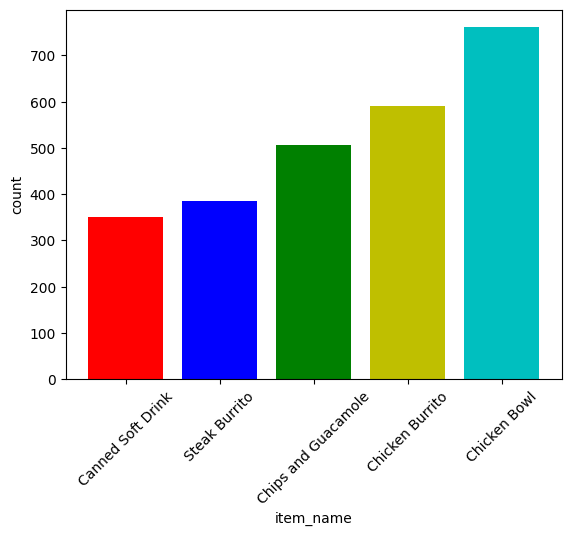

In [84]:
# c) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều lần nhất 
# (có title, xlabel, ylabel và xticks)
x = df['item_name']
y = df['count']
plt.bar(x,y,color=['r','b','g','y','c'])
plt.xticks(rotation=45)
plt.xlabel('item_name')
plt.ylabel('count')
plt.show()

In [89]:
# Câu 4) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi 
# và tổng giá trị của mỗi đơn hàng, 
# in kết quả
t = chipo.groupby('order_id')[['quantity','revenue']].sum()
t

,quantity,revenue
order_id,,
1,4,11.56
2,2,33.96
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantity</th>
      <th>revenue</th>
    </tr>
    <tr>
      <th>order_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>11.56</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>33.96</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>12.67</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>21.00</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>13.70</td>
    </tr>
  </tbody>
</table>
</details>

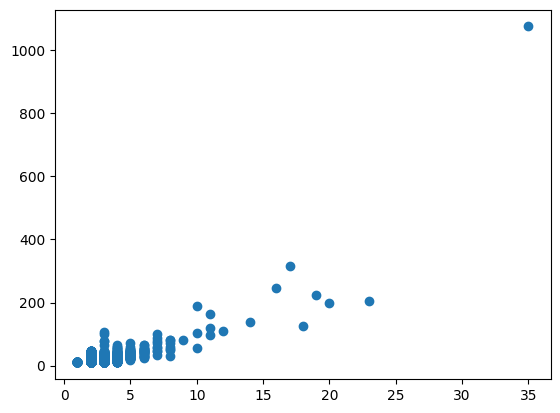

In [90]:
# Câu 5: Từ câu 4, hãy vẽ scatterplot với x là quantity, và y là revenue, có title, xlabel, ylabel
x = t['quantity']
y = t['revenue']
plt.scatter(x,y)

# Bạn có nhận xét gì qua biểu đồ này 

# Thiết lập title và labels


In [ ]:
# b) Từ biểu đồ ở câu 5a, hãy đặt plt.yscale('log'), xem kết quả và nhận xét. 



# Thiết lập title và labels


In [ ]:
# Câu 6: vẽ barh chart thể hiện 5 món có tổng thành tiền lớn nhất


In [ ]:
# b) Vẽ biểu đồ barplot cho biết 5 món được gọi nhiều nhất và trung bình item_price


In [ ]:
# c) Vẽ biểu đồ barplot cho biết 5 món được gọi nhiều nhất và trung bình revenue


In [ ]:
# Câu 7a: Vẽ histogram của item_price


In [ ]:
# b) Vẽ histogram của item_price với bins = 3


In [ ]:
# c) Hãy in ra khoảng giá trị item_price và số lần gọi món tương ứng với biểu đồ ở câu 7b

# Nhận thông tin về bins


# In ra giá trị và số lượng của mỗi bin

# Đóng biểu đồ
